## Titanic Project

## 

## Description

## Overview

The data has been split into two groups:

training set (train.csv)
test set (test.csv)
The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive.

## The Challenge

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

## Variable Notes

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [1]:
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import html5lib
import html.parser

In [2]:
%matplotlib inline

from pathlib import Path
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.utils import resample

import seaborn as sns
import matplotlib.pylab as plt

In [3]:
pwd

'C:\\Users\\dell'

In [4]:
train =  pd.read_csv(r"E:\R and statictics\titanic_train.csv")

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [7]:
train.tail(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [9]:
train[train['Sex'].str.match("female")].count()

PassengerId    314
Survived       314
Pclass         314
Name           314
Sex            314
Age            261
SibSp          314
Parch          314
Ticket         314
Fare           314
Cabin           97
Embarked       312
dtype: int64

In [10]:
train[train['Sex'].str.match("male")].count()

PassengerId    577
Survived       577
Pclass         577
Name           577
Sex            577
Age            453
SibSp          577
Parch          577
Ticket         577
Fare           577
Cabin          107
Embarked       577
dtype: int64

In [11]:
train[train["Name"].str.contains("Brown")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
194,195,1,1,"Brown, Mrs. James Joseph (Margaret Tobin)",female,44.0,0,0,PC 17610,27.7208,B4,C
328,329,1,3,"Goldsmith, Mrs. Frank John (Emily Alice Brown)",female,31.0,1,1,363291,20.5250,NaN,S
345,346,1,2,"Brown, Miss. Amelia ""Mildred""",female,24.0,0,0,248733,13.0000,F33,S
670,671,1,2,"Brown, Mrs. Thomas William Solomon (Elizabeth ...",female,40.0,1,1,29750,39.0000,NaN,S
684,685,0,2,"Brown, Mr. Thomas William Solomon",male,60.0,1,1,29750,39.0000,NaN,S


In [12]:
train[train["Name"].str.contains("Mrs")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S


<AxesSubplot:xlabel='Survived', ylabel='count'>

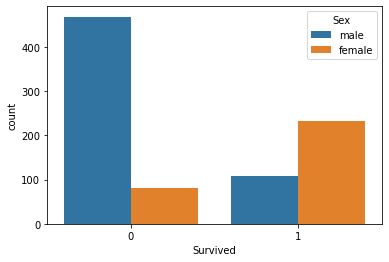

In [13]:
sns.countplot(x='Survived', hue='Sex', data=train)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

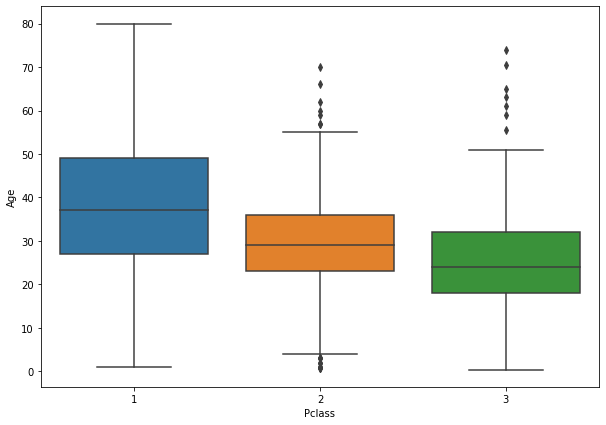

In [14]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=train)

In [15]:
def add_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        return int(train[train["Pclass"] == Pclass]["Age"].mean())
    else:
        return Age

In [16]:
train["Age"] = train[["Age", "Pclass"]].apply(add_age,axis=1)


In [17]:
train.drop("Cabin",inplace=True,axis=1)

In [18]:
train.dropna(inplace=True)

In [19]:
pd.get_dummies(train["Sex"])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [20]:
X = train.drop("Survived",axis=1)
y = train["Survived"]

In [21]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [22]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


<AxesSubplot:xlabel='Fare_Range', ylabel='Survived'>

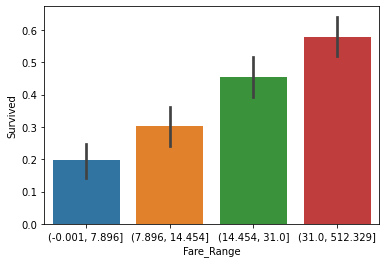

In [23]:
# Divide Fare into 4 bins
train['Fare_Range'] = pd.qcut(train['Fare'], 4)

# Barplot - Shows approximate values based
# on the height of bars.
sns.barplot(x ='Fare_Range', y ='Survived',
data = train)


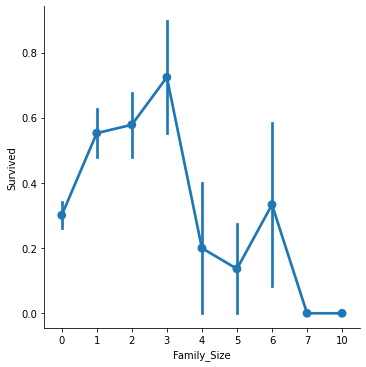

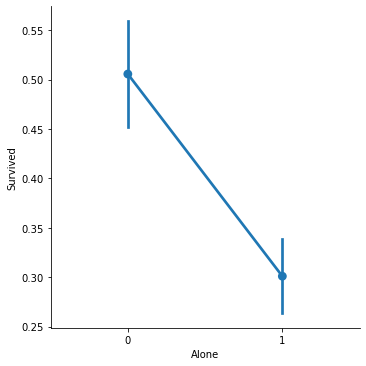

In [24]:
# Adding a column Family_Size
train['Family_Size'] = 0
train['Family_Size'] = train['Parch']+train['SibSp']

# Adding a column Alone
train['Alone'] = 0
train.loc[train.Family_Size == 0, 'Alone'] = 1

# Factorplot for Family_Size
sns.factorplot(x ='Family_Size', y ='Survived', data = train)

# Factorplot for Alone
sns.factorplot(x ='Alone', y ='Survived', data = train)


In [25]:
train['Fare'].describe()

count    889.000000
mean      32.096681
std       49.697504
min        0.000000
25%        7.895800
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [26]:
train[train['Fare'] > 500]
train[train['Fare'] > 500]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare_Range,Family_Size,Alone
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C,"(31.0, 512.329]",0,1
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C,"(31.0, 512.329]",1,0
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C,"(31.0, 512.329]",0,1


In [27]:
train[train['Fare'] == 0].head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare_Range,Family_Size,Alone
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,S,"(-0.001, 7.896]",0,1
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,S,"(-0.001, 7.896]",0,1
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,S,"(-0.001, 7.896]",0,1
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,29.0,0,0,239853,0.0,S,"(-0.001, 7.896]",0,1
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,S,"(-0.001, 7.896]",0,1


In [28]:
train[train['Fare'] == 0]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare_Range,Family_Size,Alone
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,S,"(-0.001, 7.896]",0,1
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,S,"(-0.001, 7.896]",0,1
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,S,"(-0.001, 7.896]",0,1
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,29.0,0,0,239853,0.0,S,"(-0.001, 7.896]",0,1
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,S,"(-0.001, 7.896]",0,1
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,29.0,0,0,239853,0.0,S,"(-0.001, 7.896]",0,1
466,467,0,2,"Campbell, Mr. William",male,29.0,0,0,239853,0.0,S,"(-0.001, 7.896]",0,1
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,29.0,0,0,239854,0.0,S,"(-0.001, 7.896]",0,1
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,S,"(-0.001, 7.896]",0,1
633,634,0,1,"Parr, Mr. William Henry Marsh",male,38.0,0,0,112052,0.0,S,"(-0.001, 7.896]",0,1


In [29]:
train[train['Age'] < 5].head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare_Range,Family_Size,Alone
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,"(14.454, 31.0]",4,0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S,"(14.454, 31.0]",2,0
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,Q,"(14.454, 31.0]",5,0
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.0,1,2,SC/Paris 2123,41.5792,C,"(31.0, 512.329]",3,0
63,64,0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9000,S,"(14.454, 31.0]",5,0


In [30]:
import numpy as np
from sklearn.metrics import accuracy_score
import pandas as pd
import re
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

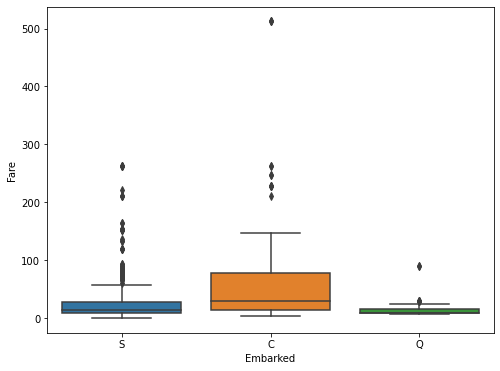

In [31]:
data = pd.concat([train["Fare"],train["Embarked"]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x="Embarked", y="Fare", data=data)

In [32]:
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare_Range,Family_Size,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S,"(-0.001, 7.896]",1,0


Text(0.5, 1.0, 'Total Missing Value (%)')

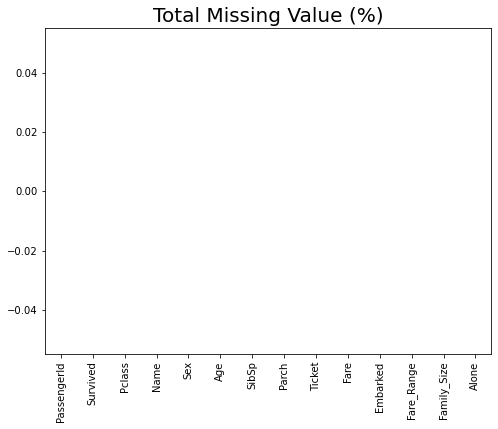

In [40]:
#missing data
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
percent_data = percent.head(100)
percent_data.plot(kind="bar", figsize = (8,6), fontsize = 10)
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Total Missing Value (%)", fontsize = 20)

In [41]:
(train.isnull().sum()/train.isnull().count())

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
Fare_Range     0.0
Family_Size    0.0
Alone          0.0
dtype: float64

In [42]:
adsf = train.isnull()

In [45]:
train.corr() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family_Size,Alone
PassengerId,1.000000,-0.005028,-0.035330,0.032544,-0.057686,-0.001657,0.012703,-0.040258,0.057649
Survived,-0.005028,1.000000,-0.335549,-0.054899,-0.034040,0.083151,0.255290,0.018277,-0.206207
Pclass,-0.035330,-0.335549,1.000000,-0.400979,0.081656,0.016824,-0.548193,0.064221,0.138553
Age,0.032544,-0.054899,-0.400979,1.000000,-0.242393,-0.173838,0.118665,-0.252539,0.167452
SibSp,-0.057686,-0.034040,0.081656,-0.242393,1.000000,0.414542,0.160887,0.890654,-0.584186
Parch,-0.001657,0.083151,0.016824,-0.173838,0.414542,1.000000,0.217532,0.782988,-0.583112
Fare,0.012703,0.255290,-0.548193,0.118665,0.160887,0.217532,1.000000,0.218658,-0.274079
Family_Size,-0.040258,0.018277,0.064221,-0.252539,0.890654,0.782988,0.218658,1.000000,-0.690654
Alone,0.057649,-0.206207,0.138553,0.167452,-0.584186,-0.583112,-0.274079,-0.690654,1.000000


In [46]:
train.shape[0]


889

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

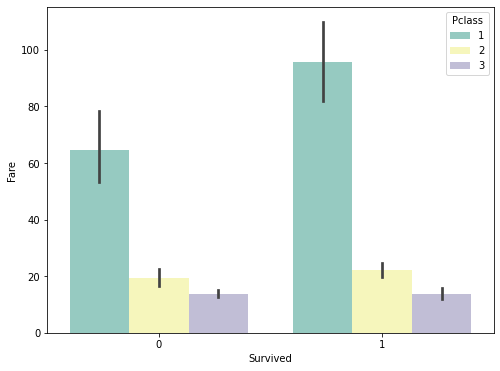

In [49]:
f, ax =  plt.subplots(figsize=(8, 6))
sns.barplot(x="Survived", y="Fare", hue="Pclass",
               data=train, palette="Set3")

In [50]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare_Range,Family_Size,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,"(-0.001, 7.896]",1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,"(31.0, 512.329]",1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,"(7.896, 14.454]",0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,"(31.0, 512.329]",1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,"(7.896, 14.454]",0,1


In [51]:
import pandas as pd
new = pd.Categorical(train["Survived"])
new = new.rename_categories(["Died","Survived"])
new.describe()

,counts,freqs
categories,,
Died,549,0.617548
Survived,340,0.382452


#    code for titanic_train

In [52]:
import pandas as pd
train =  pd.read_csv(r"E:\R and statictics\titanic_train.csv")

In [53]:
train =  pd.read_csv(r"E:\R and statictics\titanic_train.csv")

In [54]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [55]:
train["Pclass"].unique()

array([3, 1, 2], dtype=int64)

In [56]:
train["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [59]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [60]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Age'>

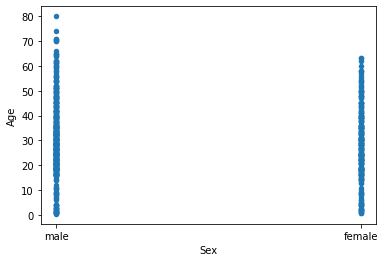

In [61]:
train.plot(kind='scatter', x='Sex',y='Age')

<AxesSubplot:>

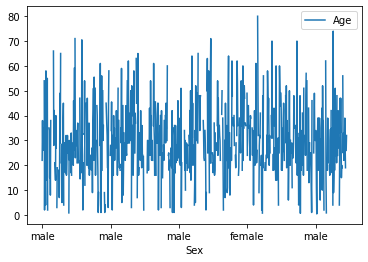

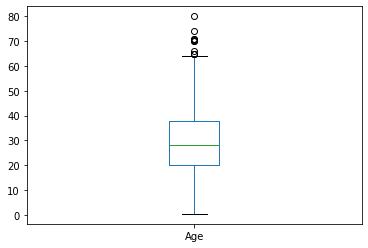

In [62]:
train.plot(kind='line', x='Sex',y='Age')
train.plot(kind='box', x='Sex',y='Age')

<AxesSubplot:xlabel='Sex'>

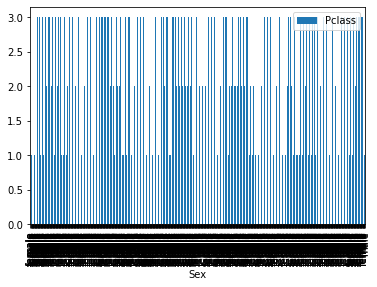

In [63]:
train.plot(kind='bar', x='Sex',y='Pclass')

<AxesSubplot:xlabel='Pclass'>

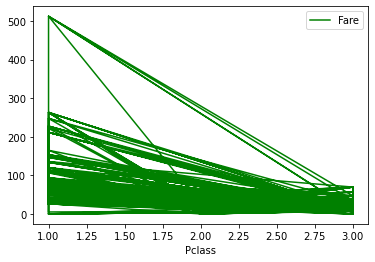

In [64]:
train.plot(kind='line', x='Pclass',y='Fare' , color='green')

<AxesSubplot:xlabel='Cabin'>

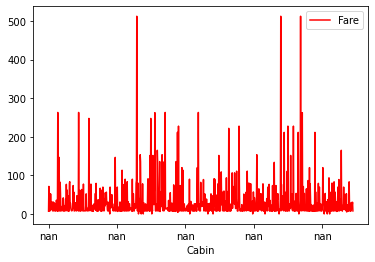

In [65]:
train.plot(kind='line', x='Cabin',y='Fare' , color='red')

In [66]:
train.style.highlight_null(null_color='green')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.250000,nan,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.000000,1,0,PC 17599,71.283300,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.925000,nan,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.100000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.050000,nan,S
5,6,0,3,"Moran, Mr. James",male,nan,0,0,330877,8.458300,nan,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.862500,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.075000,nan,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.133300,nan,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.070800,nan,C


In [68]:
missing_cabin = np.where(train["Cabin"].isnull()==True)
missing_cabin

(array([  0,   2,   4,   5,   7,   8,   9,  12,  13,  14,  15,  16,  17,
         18,  19,  20,  22,  24,  25,  26,  28,  29,  30,  32,  33,  34,
         35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,
         48,  49,  50,  51,  53,  56,  57,  58,  59,  60,  63,  64,  65,
         67,  68,  69,  70,  71,  72,  73,  74,  76,  77,  78,  79,  80,
         81,  82,  83,  84,  85,  86,  87,  89,  90,  91,  93,  94,  95,
         98,  99, 100, 101, 103, 104, 105, 106, 107, 108, 109, 111, 112,
        113, 114, 115, 116, 117, 119, 120, 121, 122, 125, 126, 127, 129,
        130, 131, 132, 133, 134, 135, 138, 140, 141, 142, 143, 144, 145,
        146, 147, 149, 150, 152, 153, 154, 155, 156, 157, 158, 159, 160,
        161, 162, 163, 164, 165, 167, 168, 169, 171, 172, 173, 175, 176,
        178, 179, 180, 181, 182, 184, 186, 187, 188, 189, 190, 191, 192,
        196, 197, 198, 199, 200, 201, 202, 203, 204, 206, 207, 208, 210,
        211, 212, 213, 214, 216, 217, 219, 220, 221

In [70]:
len(missing[0])


177

In [71]:
len(missing_cabin[0])

687

In [72]:
maximum_fare = np.where(train["Fare"]==max(train["Fare"]))
maximum_fare

(array([258, 679, 737], dtype=int64),)

In [73]:
train.loc[maximum_fare]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [74]:
train["family"]=train["SibSp"]+train["Parch"]
most_family=np.where(train["family"]==max(train["family"]))
train.loc[most_family]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S,10
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S,10
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S,10
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S,10
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S,10
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S,10
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S,10


In [75]:
len(most_family[0])

7

In [76]:
train["Survived"].unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='Sex', ylabel='Fare'>

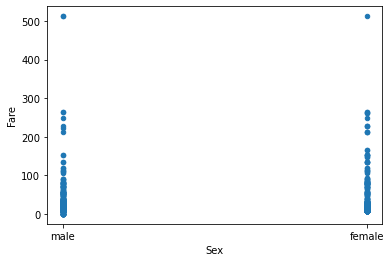

In [77]:
train.plot(kind='scatter', x='Sex',y='Fare')

In [78]:
type(train)

pandas.core.frame.DataFrame

In [79]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,family
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.904602
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,1.613459
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,10.000000


In [80]:
total = train.isnull().sum().sort_values(ascending= False)
percent_1 = (train.isnull().sum()/ train.isnull().count())*100  # count the columns which has null in it.
percent_2 = (round(percent_1,1).sort_values(ascending = False))
missing=  pd.concat([total,percent_2], axis = 1, keys = ['total','%'])
missing.head(5)

,total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0


In [81]:
# importing main libraries
import numpy as np
import pandas as pd

# importing libraries for visuaisation
import seaborn as sn
from matplotlib import pyplot as plt
from matplotlib import style as st

# Using RandomForestClassifier as algorithm
from sklearn.ensemble import RandomForestClassifier

Text(0.5, 1.0, 'MALE')

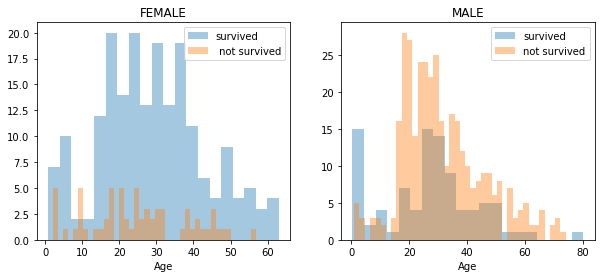

In [82]:
# AGE AND SEX CORRELATION ON SURVIVAL

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4)) #To make multiple graph axis and to tell where should these graph be placed.
female = train[train['Sex'] == 'female']
male = train[train['Sex'] == 'male']
# making a kernel density estimation graph for women who survived and women who did not with respect to age.
ax = sn.distplot(female[female['Survived'] == 1].Age.dropna(), bins = 20 , label = 'survived', ax = axes[0], kde = False)
ax = sn.distplot(female[female['Survived'] == 0].Age.dropna() , bins = 40 , label =' not survived' ,  ax = axes[0] , kde = False)
ax.legend()  # adding the box representative
ax.set_title('FEMALE')
# making a kernel density estimation graph for men who survived and women who did not with respect to age.
ax = sn.distplot(male[male['Survived'] == 1].Age.dropna(), bins = 20 , label ='survived', ax =axes[1] ,kde = False)
ax = sn.distplot(male[male['Survived'] == 0].Age.dropna(), bins = 40 ,label ='not survived', ax = axes[1],kde =False)
ax.legend()
ax.set_title("MALE")

In [83]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
family           0
dtype: int64

Text(0.5, 1.0, 'Class Q')

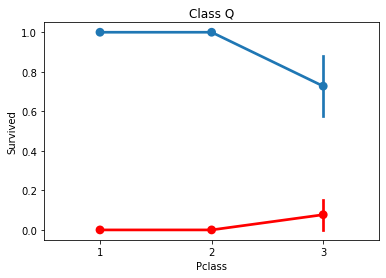

In [84]:
import matplotlib.pyplot as plt

# This is for port Q
em = sn.pointplot(x = 'Pclass',y = 'Survived', data = female[female['Embarked']== 'Q'],palette=None,  order=None, hue_order=None)
em = sn.pointplot(x = 'Pclass',y = 'Survived', data = male[male['Embarked']== 'Q'],palette=None,  order=None, hue_order=None, color = 'r')
em.set_title("Class Q")

Text(0.5, 1.0, 'Class C')

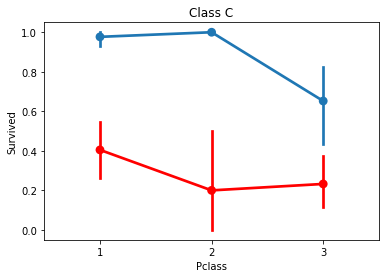

In [85]:
# We are using point plot to check. This is for port C
em = sn.pointplot(x = 'Pclass',y = 'Survived', data =  female[female['Embarked']== 'C'],palette=None,  order=None, hue_order=None)
em = sn.pointplot(x = 'Pclass',y = 'Survived', data =  male[male['Embarked']== 'C'],palette=None,  order=None, hue_order=None, color = 'r')
em.set_title("Class C")

Text(0.5, 1.0, 'Class S')

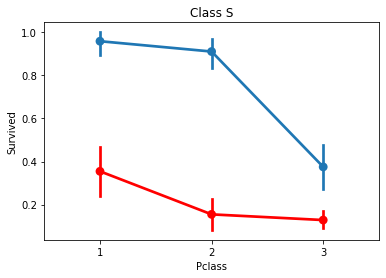

In [86]:
# this is for port S
em = sn.pointplot(x = 'Pclass',y = 'Survived', data =  female[female['Embarked']== 'S'],palette=None,  order=None, hue_order=None)
em = sn.pointplot(x = 'Pclass',y = 'Survived', data =  male[male['Embarked']== 'S'],palette=None,  order=None, hue_order=None, color = 'r')
em.set_title("Class S")

Text(0.5, 1.0, 'Class S')

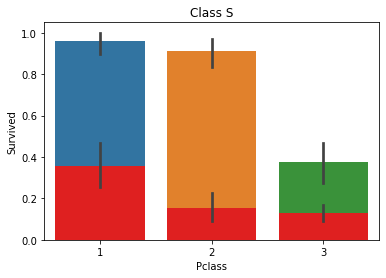

In [87]:
# this is for port S
em = sn.barplot(x = 'Pclass' ,y = 'Survived', data =  female[female['Embarked']== 'S'],palette=None,  order=None, hue_order=None)
em = sn.barplot(x = 'Pclass',y = 'Survived', data =  male[male['Embarked']== 'S'],palette=None,  order=None, hue_order=None, color = 'r')
em.set_title("Class S")

# This is for p

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

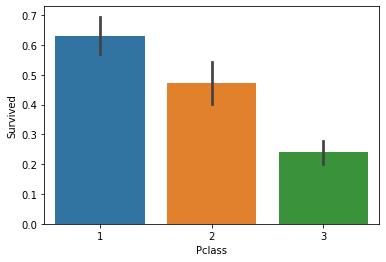

In [88]:
sn.barplot(x='Pclass', y='Survived', data=train)

In [89]:
data = [train]
for row in data:
    row['relatives'] = row['SibSp']+ row['Parch']
    row.loc[row['relatives']>0,'not_alone'] = 0
    row.loc[row['relatives'] == 0,'not_alone']=1
    row['not_alone'] = row['not_alone'].astype(int)
    
train['not_alone'].value_counts()
# this counts number of people who were alone and number who are not.

1    537
0    354
Name: not_alone, dtype: int64

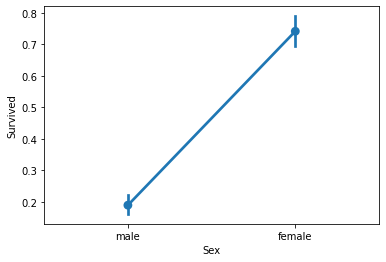

In [90]:
ax = sn.pointplot('Sex','Survived',data = train, aspect = 2.0)

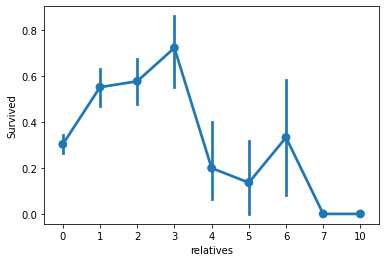

In [91]:
ax = sn.pointplot('relatives','Survived',data = train, aspect = 2.0)

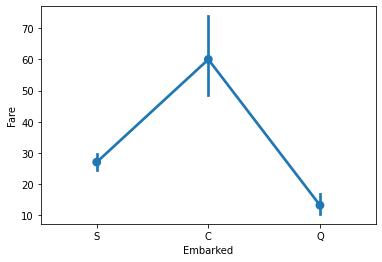

In [92]:
ax = sn.pointplot('Embarked','Fare',data = train, aspect = 2.0)

In [93]:
#Data Processing


import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data=[train]
for row in data:
    row['Cabin'] = row['Cabin'].fillna('z')
    row['Deck'] = row['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group()) # grouping all same alpha tog
    row['Deck']= row['Deck'].map(deck)
    row['Deck']= row['Deck'].fillna(0)
    row['Deck']=row['Deck'].astype(int)
    
train_11 = train.drop(['Cabin'], axis=1)

In [94]:
train['Embarked'].describe() 

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [95]:
train['Embarked'].unique() 

array(['S', 'C', 'Q', nan], dtype=object)

In [96]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
 12  family       891 non-null    int64  
 13  relatives    891 non-null    int64  
 14  not_alone    891 non-null    int32  
 15  Deck         891 non-null    int32  
dtypes: float64(2), int32(2), int64(7), object(5)
memory usage: 104.5+ KB


In [97]:
# First fare float to int.
data_fare = [train]
for row in data:
    row ['Fare']= row['Fare'].fillna(0)
    row['Fare'] =  row['Fare'].astype(int)

In [102]:
data

[     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 ..           ...       ...     ...   
 886          887         0       2   
 887          888         1       1   
 888          889         0       3   
 889          890         1       1   
 890          891         0       3   
 
                                                   Name     Sex   Age  SibSp  \
 0                              Braund, Mr. Owen Harris    male  22.0      1   
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                               Heikkinen, Miss. Laina  female  26.0      0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                             Allen, Mr. William Henry    male  35.0      0   
 ..                                               

In [108]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
